In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

In [2]:
df = pd.read_csv('K-UAD.csv')
df

,Responden,Nama,Jenis Kelamin,Asal Sekolah (SMA),P1,P2,P3,P4,P5,P6,...,P8,P9,P10,P11,P12,P13,P14,P15,EEG,Value
0,Responden ke-1,Muhammad Syauqi Firdaus,Laki-laki,Man 1 Bantul,Ya,Tidak,Ya,Tidak,Tidak,Ya,...,Ya,Ya,Ya,Tidak,Ya,Tidak,Ya,Ya,5.246051,no
1,Responden ke-2,Amral Sembodo kusumo,Laki-laki,Man 1 Bantul,Ya,Ya,Ya,Ya,Ya,Tidak,...,Ya,Ya,Tidak,Ya,Tidak,Ya,Ya,Ya,8.872114,yes
2,Responden ke-3,Hamdani Ash-Shidieqy,Laki-laki,MAN 1 BANTUL,Ya,Tidak,Ya,Tidak,Tidak,Tidak,...,Ya,Ya,Tidak,Tidak,Tidak,Tidak,Ya,Ya,4.780663,no
3,Responden ke-4,Alfi Nur Hidayah,Perempuan,Man 1 bantul,Ya,Tidak,Ya,Tidak,Tidak,Tidak,...,Ya,Ya,Tidak,Tidak,Tidak,Tidak,Ya,Ya,6.635550,no
4,Responden ke-5,Dewi Nurismaini Rofi'ah,Perempuan,MAN 1 Bantul,Ya,Ya,Ya,Tidak,Tidak,Ya,...,Ya,Ya,Ya,Tidak,Ya,Ya,Ya,Ya,7.022933,no
5,Responden ke-6,dewi syavila,Perempuan,man 1 bantul,Ya,Ya,Ya,Ya,Tidak,Ya,...,Ya,Ya,Ya,Tidak,Ya,Ya,Ya,Ya,10.759996,yes
6,Responden ke-7,Amelinda Febina,Perempuan,Man 1 Bantul,Ya,Ya,Ya,Tidak,Tidak,Tidak,...,Ya,Ya,Tidak,Tidak,Tidak,Ya,Ya,Ya,8.571008,yes
7,Responden ke-8,Hasban Ardiansyah Saputra,Laki-laki,MAN 1 BANTUL,Ya,Ya,Ya,Ya,Tidak,Ya,...,Ya,Ya,Tidak,Tidak,Tidak,Ya,Ya,Ya,9.856283,yes
8,Responden ke-9,Sofyan azis,Laki-laki,Man 1 Bantul,Ya,Tidak,Ya,Tidak,Tidak,Tidak,...,Ya,Ya,Tidak,Tidak,Tidak,Tidak,Ya,Ya,6.797797,no
9,Responden ke-10,Jundullah Syahid,Laki-laki,MAN 1 Bantul,Ya,Tidak,Ya,Tidak,Ya,Tidak,...,Ya,Ya,Tidak,Ya,Tidak,Tidak,Ya,Ya,5.589646,no


In [3]:
df.dtypes

Responden              object
Nama                   object
Jenis Kelamin          object
Asal Sekolah (SMA)     object
P1                     object
P2                     object
P3                     object
P4                     object
P5                     object
P6                     object
P7                     object
P8                     object
P9                     object
P10                    object
P11                    object
P12                    object
P13                    object
P14                    object
P15                    object
EEG                   float64
Value                  object
dtype: object

In [4]:
data = df.loc[:,['Responden','P1','P2','P3','P4','P5','P6','P7','P8','P9','P10','P11','P12','P13','P14','P15','EEG','Value']]
data

,Responden,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,EEG,Value
0,Responden ke-1,Ya,Tidak,Ya,Tidak,Tidak,Ya,Tidak,Ya,Ya,Ya,Tidak,Ya,Tidak,Ya,Ya,5.246051,no
1,Responden ke-2,Ya,Ya,Ya,Ya,Ya,Tidak,Ya,Ya,Ya,Tidak,Ya,Tidak,Ya,Ya,Ya,8.872114,yes
2,Responden ke-3,Ya,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Ya,Ya,Tidak,Tidak,Tidak,Tidak,Ya,Ya,4.780663,no
3,Responden ke-4,Ya,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Ya,Ya,Tidak,Tidak,Tidak,Tidak,Ya,Ya,6.635550,no
4,Responden ke-5,Ya,Ya,Ya,Tidak,Tidak,Ya,Tidak,Ya,Ya,Ya,Tidak,Ya,Ya,Ya,Ya,7.022933,no
5,Responden ke-6,Ya,Ya,Ya,Ya,Tidak,Ya,Ya,Ya,Ya,Ya,Tidak,Ya,Ya,Ya,Ya,10.759996,yes
6,Responden ke-7,Ya,Ya,Ya,Tidak,Tidak,Tidak,Ya,Ya,Ya,Tidak,Tidak,Tidak,Ya,Ya,Ya,8.571008,yes
7,Responden ke-8,Ya,Ya,Ya,Ya,Tidak,Ya,Tidak,Ya,Ya,Tidak,Tidak,Tidak,Ya,Ya,Ya,9.856283,yes
8,Responden ke-9,Ya,Tidak,Ya,Tidak,Tidak,Tidak,Tidak,Ya,Ya,Tidak,Tidak,Tidak,Tidak,Ya,Ya,6.797797,no
9,Responden ke-10,Ya,Tidak,Ya,Tidak,Ya,Tidak,Tidak,Ya,Ya,Tidak,Ya,Tidak,Tidak,Ya,Ya,5.589646,no


In [5]:
data = data.replace("Tidak",0)
data = data.replace("Ya",1)
data

,Responden,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,EEG,Value
0,Responden ke-1,1,0,1,0,0,1,0,1,1,1,0,1,0,1,1,5.246051,no
1,Responden ke-2,1,1,1,1,1,0,1,1,1,0,1,0,1,1,1,8.872114,yes
2,Responden ke-3,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,4.780663,no
3,Responden ke-4,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,6.635550,no
4,Responden ke-5,1,1,1,0,0,1,0,1,1,1,0,1,1,1,1,7.022933,no
5,Responden ke-6,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,10.759996,yes
6,Responden ke-7,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,8.571008,yes
7,Responden ke-8,1,1,1,1,0,1,0,1,1,0,0,0,1,1,1,9.856283,yes
8,Responden ke-9,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,6.797797,no
9,Responden ke-10,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,5.589646,no


In [6]:
sum(data['Value'] == 'yes')

11

In [7]:
data['Total'] = (data['P1']+data['P2']+data['P3']+data['P4']+data['P5']+
                data['P6']+data['P7']+data['P8']+data['P9']+data['P10']+
                data['P11']+data['P12']+data['P13']+data['P14']+data['P15'])
data

,Responden,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,EEG,Value,Total
0,Responden ke-1,1,0,1,0,0,1,0,1,1,1,0,1,0,1,1,5.246051,no,9
1,Responden ke-2,1,1,1,1,1,0,1,1,1,0,1,0,1,1,1,8.872114,yes,12
2,Responden ke-3,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,4.780663,no,6
3,Responden ke-4,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,6.635550,no,6
4,Responden ke-5,1,1,1,0,0,1,0,1,1,1,0,1,1,1,1,7.022933,no,11
5,Responden ke-6,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,10.759996,yes,13
6,Responden ke-7,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,8.571008,yes,9
7,Responden ke-8,1,1,1,1,0,1,0,1,1,0,0,0,1,1,1,9.856283,yes,10
8,Responden ke-9,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,6.797797,no,6
9,Responden ke-10,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,5.589646,no,8


In [8]:
data['Persen(%)'] = (data['Total']/15)
data['Persen(%)'] = data['Persen(%)'].apply(lambda x: '{:.2f}'.format(x) if round(x,0) == x else '{:,.2f}'.format(x))
data

,Responden,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,EEG,Value,Total,Persen(%)
0,Responden ke-1,1,0,1,0,0,1,0,1,1,1,0,1,0,1,1,5.246051,no,9,0.60
1,Responden ke-2,1,1,1,1,1,0,1,1,1,0,1,0,1,1,1,8.872114,yes,12,0.80
2,Responden ke-3,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,4.780663,no,6,0.40
3,Responden ke-4,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,6.635550,no,6,0.40
4,Responden ke-5,1,1,1,0,0,1,0,1,1,1,0,1,1,1,1,7.022933,no,11,0.73
5,Responden ke-6,1,1,1,1,0,1,1,1,1,1,0,1,1,1,1,10.759996,yes,13,0.87
6,Responden ke-7,1,1,1,0,0,0,1,1,1,0,0,0,1,1,1,8.571008,yes,9,0.60
7,Responden ke-8,1,1,1,1,0,1,0,1,1,0,0,0,1,1,1,9.856283,yes,10,0.67
8,Responden ke-9,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,6.797797,no,6,0.40
9,Responden ke-10,1,0,1,0,1,0,0,1,1,0,1,0,0,1,1,5.589646,no,8,0.53


In [9]:
for index, row in data.iterrows():
    if row['Persen(%)'] > '0.50':
        data.loc[index, 'Observation_value'] = '1'
    elif row['Persen(%)'] <= '0.50':
        data.loc[index, 'Observation_value'] = '0'

data

,Responden,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P11,P12,P13,P14,P15,EEG,Value,Total,Persen(%),Observation_value
0,Responden ke-1,1,0,1,0,0,1,0,1,1,...,0,1,0,1,1,5.246051,no,9,0.60,1
1,Responden ke-2,1,1,1,1,1,0,1,1,1,...,1,0,1,1,1,8.872114,yes,12,0.80,1
2,Responden ke-3,1,0,1,0,0,0,0,1,1,...,0,0,0,1,1,4.780663,no,6,0.40,0
3,Responden ke-4,1,0,1,0,0,0,0,1,1,...,0,0,0,1,1,6.635550,no,6,0.40,0
4,Responden ke-5,1,1,1,0,0,1,0,1,1,...,0,1,1,1,1,7.022933,no,11,0.73,1
5,Responden ke-6,1,1,1,1,0,1,1,1,1,...,0,1,1,1,1,10.759996,yes,13,0.87,1
6,Responden ke-7,1,1,1,0,0,0,1,1,1,...,0,0,1,1,1,8.571008,yes,9,0.60,1
7,Responden ke-8,1,1,1,1,0,1,0,1,1,...,0,0,1,1,1,9.856283,yes,10,0.67,1
8,Responden ke-9,1,0,1,0,0,0,0,1,1,...,0,0,0,1,1,6.797797,no,6,0.40,0
9,Responden ke-10,1,0,1,0,1,0,0,1,1,...,1,0,0,1,1,5.589646,no,8,0.53,1


In [28]:
data_classification = data.loc[:,['Responden','EEG','Observation_value','Value']]

data_classification

,Responden,EEG,Observation_value,Value
0,Responden ke-1,5.246051,1,no
1,Responden ke-2,8.872114,1,yes
2,Responden ke-3,4.780663,0,no
3,Responden ke-4,6.635550,0,no
4,Responden ke-5,7.022933,1,no
5,Responden ke-6,10.759996,1,yes
6,Responden ke-7,8.571008,1,yes
7,Responden ke-8,9.856283,1,yes
8,Responden ke-9,6.797797,0,no
9,Responden ke-10,5.589646,1,no


In [10]:
attributes = ['EEG','Observation_value']
target = ['Value']

x = data[attributes]
y = data[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4)

#model_nb = GaussianNB()
#model_nb.fit(x_train, y_train)
#model_nb.score(x_test, y_test)

model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(x_train, y_train)
model_knn.score(x_test, y_test)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


1.0

In [11]:
import matplotlib.pyplot as plt

train = len(x_train.index)
test = len(x_test.index)
print('Data Train :',train,'\nData Test :',test)
print('Index Data Train : ',x_train.index)
print('Index Data Test : ',x_test.index)

Data Train : 18 
Data Test : 12
Index Data Train :  Int64Index([20, 21, 25, 1, 18, 24, 14, 28, 19, 12, 9, 29, 15, 4, 2, 17, 26, 6], dtype='int64')
Index Data Test :  Int64Index([22, 16, 27, 13, 8, 3, 23, 7, 5, 10, 0, 11], dtype='int64')


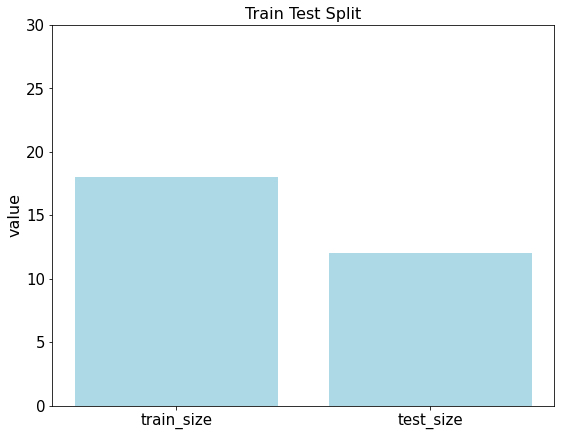

In [12]:
ket_x = ['train_size','test_size']
tts = [train,test]

plt.figure(figsize=(9,7))
plt.bar(ket_x, tts, color='lightblue')
plt.title('Train Test Split', size=16)
plt.ylabel('value', size=16)
plt.xticks(size=15)
plt.yticks(size=15)
plt.ylim(0,30)
plt.show()

In [13]:
#prediksi_nb = model_nb.predict(x_test)
#confusion_matrix(prediksi_nb, y_test)
#prediksi_nb

prediksi_knn = model_knn.predict(x_test)
confusion_matrix(prediksi_knn, y_test)
#prediksi_knn

array([[9, 0],
       [0, 3]], dtype=int64)

In [14]:
x_test

,EEG,Observation_value
22,6.881214,0
16,6.846838,0
27,7.922862,1
13,8.235917,1
8,6.797797,0
3,6.635550,0
23,5.615381,1
7,9.856283,1
5,10.759996,1
10,5.724164,1


In [15]:
data

,Responden,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P11,P12,P13,P14,P15,EEG,Value,Total,Persen(%),Observation_value
0,Responden ke-1,1,0,1,0,0,1,0,1,1,...,0,1,0,1,1,5.246051,no,9,0.60,1
1,Responden ke-2,1,1,1,1,1,0,1,1,1,...,1,0,1,1,1,8.872114,yes,12,0.80,1
2,Responden ke-3,1,0,1,0,0,0,0,1,1,...,0,0,0,1,1,4.780663,no,6,0.40,0
3,Responden ke-4,1,0,1,0,0,0,0,1,1,...,0,0,0,1,1,6.635550,no,6,0.40,0
4,Responden ke-5,1,1,1,0,0,1,0,1,1,...,0,1,1,1,1,7.022933,no,11,0.73,1
5,Responden ke-6,1,1,1,1,0,1,1,1,1,...,0,1,1,1,1,10.759996,yes,13,0.87,1
6,Responden ke-7,1,1,1,0,0,0,1,1,1,...,0,0,1,1,1,8.571008,yes,9,0.60,1
7,Responden ke-8,1,1,1,1,0,1,0,1,1,...,0,0,1,1,1,9.856283,yes,10,0.67,1
8,Responden ke-9,1,0,1,0,0,0,0,1,1,...,0,0,0,1,1,6.797797,no,6,0.40,0
9,Responden ke-10,1,0,1,0,1,0,0,1,1,...,1,0,0,1,1,5.589646,no,8,0.53,1


In [16]:
#print(classification_report(prediksi_nb, y_test))

print(classification_report(prediksi_knn, y_test))

              precision    recall  f1-score   support

          no       1.00      1.00      1.00         9
         yes       1.00      1.00      1.00         3

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



In [17]:
features_train = x_train
labels_train = y_train

features_test = x_test
labels_test = y_test

In [18]:
#score_train = model_nb.score(features_train, labels_train)
#score_test = model_nb.score(features_test, labels_test)

score_train = model_knn.score(features_train, labels_train)
score_test = model_knn.score(features_test, labels_test)

print('Train set score:',score_train)
print('Test set score:',score_test)

Train set score: 1.0
Test set score: 1.0
